In [1]:
import SimpleITK as sitk
import numpy as np
import scipy
import os, sys, time, datetime
import pathlib
import matplotlib.pyplot as plt
import re
import Metrics
import ImageProcessing

In [2]:
savefig_directory = 'C:/Users/nfdlam/OneDrive - The Hong Kong Polytechnic University/images/CXR-GAN/DRR'

patient_code = '0005'
# Information for each patient
if patient_code == '0005':
    print(patient_code)
    validation_bone_file = '0005-bone.seg.nrrd'
    validation_lung_file = '0005-lung.seg.nrrd'
    axial_slice = 115
    coronal_slice = 257
    sagittal_slice = 329
    
    auto_bone_file = '0005_bone_autosegmentation.npy'
    auto_lung_file = '0005_lung_autosegmentation.npy'

tissue_range = ["bone","lung"]

0005


D:\data\CT-Covid-19-August2020\validation_segmentations
D:\data\CT-Covid-19-August2020\auto_segmentation
DSC for bone: 0.9025250119104335
Jaccard for bone: 0.822364993922556
DSC for lung: 0.9998860456577064
Jaccard for lung: 0.999772117283638


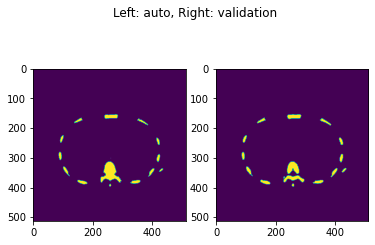

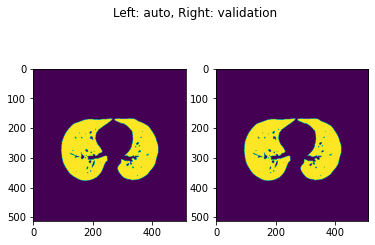

In [3]:
# VALIDATION FILE PATH
directoryPath_validation = pathlib.Path("D:/data/CT-Covid-19-August2020/validation_segmentations/")
print(directoryPath_validation)
directoryPath_auto = pathlib.Path("D:/data/CT-Covid-19-August2020/auto_segmentation/")
print(directoryPath_auto)

for tissue in tissue_range:
    if tissue =="bone":
        validation_file = validation_bone_file
        auto_file = auto_bone_file
    if tissue =="lung":
        validation_file = validation_lung_file
        auto_file = auto_lung_file
    
    # LOAD VALIDATION FILE
    validation_file_path = os.path.join(directoryPath_validation, validation_file)

    # Load image
    reader = sitk.ImageFileReader()
    reader.SetFileName(validation_file_path)
    reader.LoadPrivateTagsOn()
    reader.ReadImageInformation()
    # Read Metadata
    for k in reader.GetMetaDataKeys():
        v = reader.GetMetaData(k)
        #print(f"({k}) = = \"{v}\"")
    image = reader.Execute();

    validation_array = sitk.GetArrayFromImage(image)

    axial_validation = validation_array[axial_slice,:,:]
    coronal_validation = validation_array[:,coronal_slice,:]
    sagittal_validation = validation_array[:,:,sagittal_slice]

    #plt.imshow(axial_validation)
    #plt.plot
    
    # LOAD AUTO FILE
    auto_array = np.load(os.path.join(directoryPath_auto, auto_file))
    axial_auto = auto_array[axial_slice,:,:]
    coronal_auto = auto_array[:,coronal_slice,:]
    sagittal_auto = auto_array[:,:,sagittal_slice]
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle('Left: auto, Right: validation')
    ax1.imshow(axial_auto)
    ax2.imshow(axial_validation)
    fig.savefig(os.path.join(savefig_directory,patient_code+"_"+tissue+'_autoVSvalidation.png'), dpi=150)
    
    # CALCULATE METRICS
    DSC = Metrics.DiceSimilarityCoefficient(axial_auto, axial_validation)
    Jaccard = Metrics.JaccardIndex(axial_auto, axial_validation)
    print("DSC for "+tissue+": "+str(DSC))
    print("Jaccard for "+tissue+": "+str(Jaccard))
    